## Определение простой сети

Воспользуемся библиотекой Keras, чтобы определить сеть, распознающую рукописные цифры из набора Mnist. начнем с очень простой нейросети и постепенно будем ее улучшать.
Keras предоставляет средства для загрузки набора данных и разбиения его на обучающий, x_train, и тестовый, x_test. для поддержки вычислений на gpu данные преобразуются к типу float32 и нормируются на интервал [0, 1]. кроме того, в y_train и y_test мы загружаем правильные метки и применяем к ним унитарное кодирование. Вот как выглядит код:

In [49]:
import tensorflow as tf

In [50]:
tf.__version__

'2.15.0'

In [51]:
import pandas as pd
file_path_test ="C:/Users/qiarr/Desktop/task/lesson 25/task/cs-test.csv"
data_test = pd.read_csv(file_path_test, encoding='cp1251', )

file_path_train ="C:/Users/qiarr/Desktop/task/lesson 25/task/cs-training.csv"
data_train = pd.read_csv(file_path_train, encoding='cp1251', )

In [52]:
data_train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [53]:
data_test

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [54]:
data_test.info

<bound method DataFrame.info of         Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  \
0                1               NaN                              0.885519   
1                2               NaN                              0.463295   
2                3               NaN                              0.043275   
3                4               NaN                              0.280308   
4                5               NaN                              1.000000   
...            ...               ...                                   ...   
101498      101499               NaN                              0.282653   
101499      101500               NaN                              0.922156   
101500      101501               NaN                              0.081596   
101501      101502               NaN                              0.335457   
101502      101503               NaN                              0.441842   

        age  NumberOfTime30-59D

In [55]:
for column in data_test.columns:
    unique_values = data_test[column].unique()
    print(f"Уникальные значения в столбце {column}: {unique_values}")

Уникальные значения в столбце Unnamed: 0: [     1      2      3 ... 101501 101502 101503]
Уникальные значения в столбце SeriousDlqin2yrs: [nan]
Уникальные значения в столбце RevolvingUtilizationOfUnsecuredLines: [0.88551908 0.46329527 0.04327504 ... 0.08159637 0.33545655 0.44184166]
Уникальные значения в столбце age: [ 43  57  59  38  27  63  50  79  68  23  37  52  30  56  28  72  29  48
  61  69  51  45  67  34  47  44  55  54  49  32  41  40  46  60  80  87
  36  74  53  31  71  62  25  22  26  33  42  58  39  64  93  65  76  78
  35  66  77  73  84  24  75  82  89  70  95  21  86  91  83  81  96  88
  92  85  90  94 101  99  98  97 104 100]
Уникальные значения в столбце NumberOfTime30-59DaysPastDueNotWorse: [ 0  1 98  2  4  3  8  5  6  7  9 10 96 12 11 19]
Уникальные значения в столбце DebtRatio: [1.77512717e-01 5.27236928e-01 6.87647522e-01 ... 9.34217437e-01
 3.56800000e+03 1.98918371e-01]
Уникальные значения в столбце MonthlyIncome: [ 5700.  9141.  5083. ...  5719. 43333. 67749.

In [56]:
for column in data_test.columns:
    unique_values = data_train[column].unique()
    print(f"Уникальные значения в столбце {column}: {unique_values}")

Уникальные значения в столбце Unnamed: 0: [     1      2      3 ... 149998 149999 150000]
Уникальные значения в столбце SeriousDlqin2yrs: [1 0]
Уникальные значения в столбце RevolvingUtilizationOfUnsecuredLines: [0.76612661 0.95715102 0.65818014 ... 0.29974515 0.24604392 0.85028295]
Уникальные значения в столбце age: [ 45  40  38  30  49  74  57  39  27  51  46  76  64  78  53  43  25  32
  58  50  69  24  28  62  42  75  26  52  41  81  31  68  70  73  29  55
  35  72  60  67  36  56  37  66  83  34  44  48  61  80  47  59  77  63
  54  33  79  65  86  92  23  87  71  22  90  97  84  82  91  89  85  88
  21  93  96  99  94  95 101  98 103 102 107 105   0 109]
Уникальные значения в столбце NumberOfTime30-59DaysPastDueNotWorse: [ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]
Уникальные значения в столбце DebtRatio: [0.80298213 0.1218762  0.08511338 ... 0.40429286 0.71656222 0.24990808]
Уникальные значения в столбце MonthlyIncome: [ 9120.  2600.  3042. ... 15648.   521.  7647.]
Уникаль

In [57]:

for column in data_train.columns:
   nan_finder = data_train[column].isna().any()
   print(f"Уникальные значения в столбце {column}: {nan_finder}")
# Данных много и невсем понятно есть ли данные с nan в цене билета

Уникальные значения в столбце Unnamed: 0: False
Уникальные значения в столбце SeriousDlqin2yrs: False
Уникальные значения в столбце RevolvingUtilizationOfUnsecuredLines: False
Уникальные значения в столбце age: False
Уникальные значения в столбце NumberOfTime30-59DaysPastDueNotWorse: False
Уникальные значения в столбце DebtRatio: False
Уникальные значения в столбце MonthlyIncome: True
Уникальные значения в столбце NumberOfOpenCreditLinesAndLoans: False
Уникальные значения в столбце NumberOfTimes90DaysLate: False
Уникальные значения в столбце NumberRealEstateLoansOrLines: False
Уникальные значения в столбце NumberOfTime60-89DaysPastDueNotWorse: False
Уникальные значения в столбце NumberOfDependents: True


In [58]:
for column in data_test.columns:
       nan_finder = data_test[column].isna().any()
       print(f"Уникальные значения в столбце {column}: {nan_finder}")
# Данных много и невсем понятно есть ли данные с nan в цене билета

Уникальные значения в столбце Unnamed: 0: False
Уникальные значения в столбце SeriousDlqin2yrs: True
Уникальные значения в столбце RevolvingUtilizationOfUnsecuredLines: False
Уникальные значения в столбце age: False
Уникальные значения в столбце NumberOfTime30-59DaysPastDueNotWorse: False
Уникальные значения в столбце DebtRatio: False
Уникальные значения в столбце MonthlyIncome: True
Уникальные значения в столбце NumberOfOpenCreditLinesAndLoans: False
Уникальные значения в столбце NumberOfTimes90DaysLate: False
Уникальные значения в столбце NumberRealEstateLoansOrLines: False
Уникальные значения в столбце NumberOfTime60-89DaysPastDueNotWorse: False
Уникальные значения в столбце NumberOfDependents: True


In [59]:
median = data_train['MonthlyIncome'].median()
data_train['MonthlyIncome'] = data_train['MonthlyIncome'].fillna(median)
data_test['MonthlyIncome'] = data_test['MonthlyIncome'].fillna(median)
# Заменяем все значения nan в 'Столбец_2' нулями
data_train['NumberOfDependents'] = data_train['NumberOfDependents'].fillna(0)
data_test['NumberOfDependents'] = data_test['NumberOfDependents'].fillna(0)

In [60]:
for column in data_test.columns:
       nan_finder = data_test[column].isna().any()
       print(f"Уникальные значения в столбце {column}: {nan_finder}")
print("---------------------------------------------------------------")       

for column in data_test.columns:
       nan_finder = data_train[column].isna().any()
       print(f"Уникальные значения в столбце {column}: {nan_finder}")


Уникальные значения в столбце Unnamed: 0: False
Уникальные значения в столбце SeriousDlqin2yrs: True
Уникальные значения в столбце RevolvingUtilizationOfUnsecuredLines: False
Уникальные значения в столбце age: False
Уникальные значения в столбце NumberOfTime30-59DaysPastDueNotWorse: False
Уникальные значения в столбце DebtRatio: False
Уникальные значения в столбце MonthlyIncome: False
Уникальные значения в столбце NumberOfOpenCreditLinesAndLoans: False
Уникальные значения в столбце NumberOfTimes90DaysLate: False
Уникальные значения в столбце NumberRealEstateLoansOrLines: False
Уникальные значения в столбце NumberOfTime60-89DaysPastDueNotWorse: False
Уникальные значения в столбце NumberOfDependents: False
---------------------------------------------------------------
Уникальные значения в столбце Unnamed: 0: False
Уникальные значения в столбце SeriousDlqin2yrs: False
Уникальные значения в столбце RevolvingUtilizationOfUnsecuredLines: False
Уникальные значения в столбце age: False
Уника

In [61]:
from sklearn.model_selection import train_test_split
X_train = data_train.drop("SeriousDlqin2yrs", axis=1)  # Удаляем столбец SeriousDlqin2yrs из X_train
y_train = data_train["SeriousDlqin2yrs"]  # Выбираем только столбец SeriousDlqin2yrs для y_train
#X_test= data_test.drop("SeriousDlqin2yrs", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 104025 to 121958
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            120000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  120000 non-null  float64
 2   age                                   120000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  120000 non-null  int64  
 4   DebtRatio                             120000 non-null  float64
 5   MonthlyIncome                         120000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       120000 non-null  int64  
 7   NumberOfTimes90DaysLate               120000 non-null  int64  
 8   NumberRealEstateLoansOrLines          120000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  120000 non-null  int64  
 10  NumberOfDependents                    120000 non-null  float64
dtype

In [63]:
y_train

104025    0
5415      0
75612     0
138169    0
87184     0
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: SeriousDlqin2yrs, Length: 120000, dtype: int64

In [64]:
tf.config.list_physical_devices('GPU')

[]

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.fit_transform(X_test)

In [66]:
import numpy as np


In [67]:
import keras
np.random.seed(42)  # для воспроизводимости результатов

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
# сеть и ее обучение 
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 1   # количество результатов = числу цифр
OPTIMIZER = tf.keras.optimizers.SGD() # SGD оптимизатор
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # какая часть обучающего набора зарезервирована 



In [68]:
import matplotlib.pyplot as plt

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 12        
                                                                 
 dense_7 (Dense)             (None, 128)               256       
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 397 (1.55 KB)
Trainable params: 397 (1.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
410/750 [===============>..............] - ETA: 0s - loss: 0.2716 - accuracy: 0.9165

750/750 [==============================] - 2s 2ms/step - loss: 0.2610 - accuracy: 0.9236 - val_loss: 0.2471 - val_accuracy: 0.9325
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.9328 - val_loss: 0.2471 - val_accuracy: 0.9325
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.9328 - val_loss: 0.2472 - val_accuracy: 0.9325
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.9328 - val_loss: 0.2471 - val_accuracy: 0.9325
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.9328 - val_loss: 0.2471 - val_accuracy: 0.9325
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.9328 - val_loss: 0.2471 - val_accuracy: 0.9325
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2464 - accuracy: 0.9328 - val_loss: 0.2471 - val_accuracy: 0.9325
Epoch 8/20
750/75

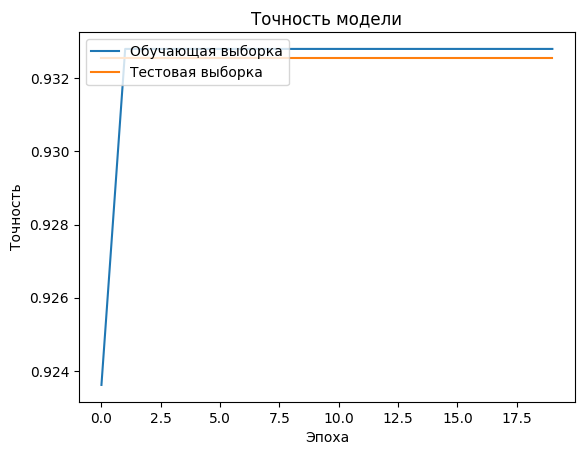

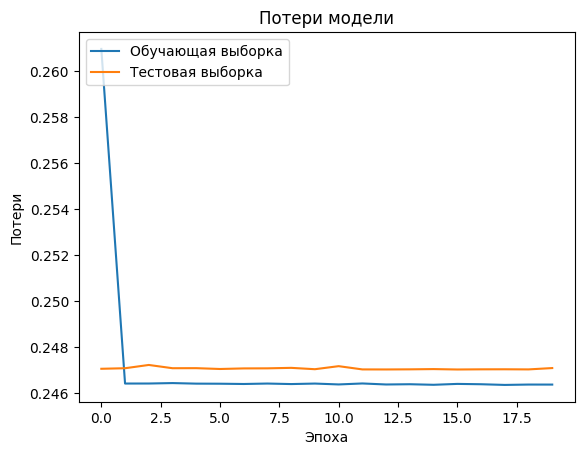

In [69]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Изменено количество нейронов и активация
model.add(tf.keras.layers.Dense(N_HIDDEN, activation='sigmoid'))
#model.add(Activation('relu'))
model.add(tf.keras.layers.Dense(NB_CLASSES, activation='sigmoid'))
#model.add(Activation('softmax'))

# Построить модель, вызвав метод build() или обучив модель на одном батче данных
model.build(input_shape=(None, normalized_X_train.shape[1]))  # Указать размерность входных данных для построения модели

model.compile(loss='binary_crossentropy',  # Изменена функция потерь
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

model.summary()

history = model.fit(normalized_X_train, y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(normalized_X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
# График для точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper left')
plt.show()

# График для потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('Эпоха')
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper left')
plt.show()


In [ ]:
import keras
np.random.seed(42)  # для воспроизводимости результатов

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
# сеть и ее обучение 
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 1   # количество результатов = числу цифр
OPTIMIZER = tf.keras.optimizers.SGD() # SGD оптимизатор
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # какая часть обучающего набора зарезервирована 

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Изменено количество нейронов и активация
model.add(tf.keras.layers.Dense(N_HIDDEN, activation='sigmoid'))
#model.add(Activation('relu'))
model.add(tf.keras.layers.Dense(NB_CLASSES, activation='sigmoid'))
#model.add(Activation('softmax'))

# Построить модель, вызвав метод build() или обучив модель на одном батче данных
model.build(input_shape=(None, normalized_X_train.shape[1]))  # Указать размерность входных данных для построения модели

model.compile(loss='binary_crossentropy',  # Изменена функция потерь
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

model.summary()

history = model.fit(normalized_X_train, y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(normalized_X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())
# summarize history for accuracy
# График для точности
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper left')
plt.show()

# График для потерь
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('Эпоха')
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='upper left')
plt.show()
